In [1]:
import networkx as nx

In [2]:
import json 
fr = open("contacts.json",'rb')
obj = json.load(fr)
obj

[{'Id': 0,
  'Email': 'gkzAbIy@qq.com',
  'Phone': '',
  'Contacts': 1,
  'OrderId': ''},
 {'Id': 1,
  'Email': '',
  'Phone': '329442681752',
  'Contacts': 4,
  'OrderId': 'vDDJJcxfLtSfkooPhbYnJdxov'},
 {'Id': 2, 'Email': '', 'Phone': '9125983679', 'Contacts': 0, 'OrderId': ''},
 {'Id': 3,
  'Email': 'mdllpYmE@gmail.com',
  'Phone': '',
  'Contacts': 0,
  'OrderId': 'bHquEnCbbsGLqllwryxPsNOxa'},
 {'Id': 4, 'Email': '', 'Phone': '300364407', 'Contacts': 2, 'OrderId': ''},
 {'Id': 5, 'Email': '', 'Phone': '840113148', 'Contacts': 0, 'OrderId': ''},
 {'Id': 6,
  'Email': 'hESiBgYTxMnj@hotmail.com',
  'Phone': '',
  'Contacts': 4,
  'OrderId': ''},
 {'Id': 7,
  'Email': 'hqyunTiaXfIjhO@yahoo.com',
  'Phone': '',
  'Contacts': 1,
  'OrderId': 'vxjYZtMUvNhtEBDruzQfjpsmX'},
 {'Id': 8,
  'Email': 'XGUjcSiDpFKWEUCs@qq.com',
  'Phone': '223604620644',
  'Contacts': 2,
  'OrderId': ''},
 {'Id': 9,
  'Email': 'osIIQgAiZX@hotmail.com',
  'Phone': '',
  'Contacts': 0,
  'OrderId': 'IqewrMXVTJqSsVkl

In [3]:
import pandas as pd
df = pd.DataFrame(obj)
df.head()

,Id,Email,Phone,Contacts,OrderId
0,0,gkzAbIy@qq.com,,1,
1,1,,329442681752,4,vDDJJcxfLtSfkooPhbYnJdxov
2,2,,9125983679,0,
3,3,mdllpYmE@gmail.com,,0,bHquEnCbbsGLqllwryxPsNOxa
4,4,,300364407,2,


In [4]:
email_dict = df.groupby('Email')['Id'].apply(list).to_dict()
phone_dict = df.groupby('Phone')['Id'].apply(list).to_dict()
orderId_dict = df.groupby('OrderId')['Id'].apply(list).to_dict()

In [5]:
del email_dict['']
del phone_dict['']
del orderId_dict['']

In [6]:
email_dict

{'AAAQbNfGbLAeOvw@hotmail.com': [112387, 470075],
 'AAAgyKTteOjasN@qq.com': [338154],
 'AABZmKeEldvO@gmail.com': [426495],
 'AABneiGcqcz@qq.com': [37868],
 'AABtOIZmdYdKGnidAK@yahoo.com': [137956],
 'AADMnHjRAVJ@yahoo.com': [494574],
 'AADMsTZAxsOHvqnKjg@hotmail.com': [19504, 179125],
 'AAEdstsQlG@gmail.com': [299505],
 'AAFCdSUDpTu@hotmail.com': [299171],
 'AAFsFMAfPCS@qq.com': [386346],
 'AAFtcxPyCNETUZuVq@yahoo.com': [99859],
 'AAHGdVxWJVRtKOSdgHKV@qq.com': [326760],
 'AAHjYELrfgvjqCoZ@hotmail.com': [76239],
 'AAHmiENRMnmAvRqFNKe@qq.com': [462902],
 'AAIXcxIAYhn@hotmail.com': [487374],
 'AAJboPehjAJajqxGPrjn@hotmail.com': [87543],
 'AAJcFFDgfLHBkDrXoaDx@yahoo.com': [20825, 337532],
 'AAKUqaw@hotmail.com': [305394],
 'AALsQhEpZeeDsn@gmail.com': [362],
 'AANxrVHcdxIrc@qq.com': [153039],
 'AAOPaYMogBRr@gmail.com': [221848, 330517],
 'AAPIPtjhTqBsjvnutTU@hotmail.com': [254424, 367012, 390060],
 'AAPxNUW@hotmail.com': [214212],
 'AAQCsQbKThqf@yahoo.com': [447264],
 'AAQOOrRiCVUovJV@yahoo

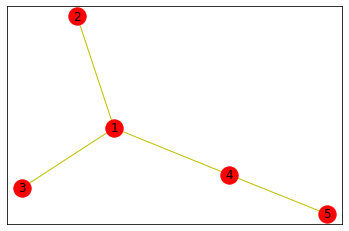

In [7]:
from matplotlib import pyplot as plt  
g=nx.Graph() 
g.add_nodes_from([1,2,3,4,5]) 
g.add_edges_from([(1,2),(1,3),(1,4),(4,5)]) 
nx.draw_networkx(g,node_color="r",edge_color="y") 
plt.show()

In [8]:
G = nx.Graph()
G.add_nodes_from(df.Id.tolist())
#G.nodes()

In [9]:
def genEdges(ll):
    r = []
    for i in range(len(ll)):
#         print(i,len(ll))
        for j in range(i+1,len(ll)):
            if i == j : break
#             print(ll[i],'->',ll[j],end=', ')
            r.append([ll[i],ll[j]])
#         print()
    return r
genEdges([1,2,3,4,5])

[[1, 2],
 [1, 3],
 [1, 4],
 [1, 5],
 [2, 3],
 [2, 4],
 [2, 5],
 [3, 4],
 [3, 5],
 [4, 5]]

In [10]:
email_edges = []
for e in email_dict:
    email_edges.extend(genEdges(email_dict[e]))
G.add_edges_from(email_edges)

In [11]:
phone_edges = []
for e in phone_dict:
    phone_edges.extend(genEdges(phone_dict[e]))
    
G.add_edges_from(phone_edges)

In [12]:
order_edges = []
for e in orderId_dict:
    order_edges.extend(genEdges(orderId_dict[e]))
    
G.add_edges_from(order_edges)

In [13]:
components = list(nx.connected_components(G))
print(list(components[2]))
components

[159312, 2, 348955, 322639]


[{0},
 {1, 2458, 98519, 115061, 140081, 165605, 476346},
 {2, 159312, 322639, 348955},
 {3},
 {4},
 {5, 50, 212533, 215197, 226720, 383605, 404324, 458692, 482810},
 {6, 38, 32871, 142067, 236367},
 {7},
 {8, 183160, 406623},
 {9, 13, 16708, 33415, 343161, 417916, 468927, 484896},
 {10, 93270},
 {11, 244207},
 {12, 160893, 480595},
 {14, 65749, 83313, 267520, 323910, 359095},
 {15, 17, 21197, 486106},
 {16},
 {18,
  10380,
  26580,
  70474,
  70621,
  79466,
  121268,
  159329,
  176080,
  235210,
  261681,
  274269,
  327057,
  382449,
  415657,
  450623},
 {19, 406780},
 {20},
 {21, 499255},
 {22, 4562, 106701, 231013, 269015, 298102, 408655, 416176, 453177, 473446},
 {23, 1944, 49506, 192016},
 {24, 1485, 112670, 118722, 139764, 235060, 278469, 386186, 412121},
 {25},
 {26, 229592, 402598},
 {27, 246, 41540, 112494, 158446, 237701, 259786},
 {28, 1271, 26068, 177136, 271446, 382292, 487899, 495579},
 {29, 64140, 364569, 437861, 463960},
 {30, 19563},
 {31, 66232},
 {32},
 {33, 459, 

In [14]:
temp_df = df.iloc[list(components[2]),:]
temp_df

,Id,Email,Phone,Contacts,OrderId
159312,159312,EQnHOWbVizLZxRnm@gmail.com,5994952372,1,FTUBZYkUAEPIYmYvxtxKYYlqt
2,2,,9125983679,0,
348955,348955,EQnHOWbVizLZxRnm@gmail.com,9125983679,0,
322639,322639,EQnHOWbVizLZxRnm@gmail.com,,3,zDhCFyaTJEqyxtEqiHxdTPmPt


In [15]:
def com2str(temp_df):
    Id_list = temp_df.Id.tolist()
    Id_list.sort()
#     Id_list
    total_conacts=temp_df.Contacts.sum()
#     total_conacts
    column2_str = "-".join([str(x) for x in Id_list])+", "+str(total_conacts)
    return column2_str

In [16]:
com2str(temp_df)

'2-159312-322639-348955, 4'

In [17]:
df['ticket_trace/contact']=['']*5000*100
assert (df['ticket_trace/contact']=='').sum() ==5000*100

In [18]:
for i in range(len(components)):
    id_list = list(components[i])
    temp_df = df.iloc[id_list,:]
    column2_str = com2str(temp_df)
    
    for ii in id_list:
        df.at[ii,'ticket_trace/contact']= column2_str

In [19]:
assert (df['ticket_trace/contact']=='').sum() ==0

In [20]:
output_df = df[['Id','ticket_trace/contact']]
output_df.columns = ['ticket_id','ticket_trace/contact']
output_df.head()

,ticket_id,ticket_trace/contact
0,0,"0, 1"
1,1,"1-2458-98519-115061-140081-165605-476346, 12"
2,2,"2-159312-322639-348955, 4"
3,3,"3, 0"
4,4,"4, 2"
